In [68]:
import mne
import numpy as np
from scipy import io as sio, signal, stats
import matplotlib.pyplot as plt

In [79]:
data = sio.loadmat('./ecog/ECoG_Handpose.mat')

sfreq = 1200.0

time = data['y'][0]
ecog = data['y'][1:61]
stim = data['y'][61:]

chan_idx = np.arange(1, ecog.shape[0] + 1)

ch_names = ['ECoG{}'.format(i) for i in chan_idx] # list of channels names
ch_names += ['gesture', 'thumb', 'index', 'middle', 'ring', 'little']
ch_types = ['ecog']*len(ecog) # list of channels types (all EEG)
ch_types += ['stim']*6

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types) # create mne info object
raw = mne.io.RawArray(data['y'][1:], info) # create mne RawArray

raw.filter(1,500)
raw.set_eeg_reference('average')

Creating RawArray with float64 data, n_channels=66, n_times=507025
    Range : 0 ... 507024 =      0.000 ...   422.520 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 500.00 Hz
- Upper transition bandwidth: 100.00 Hz (-6 dB cutoff frequency: 550.00 Hz)
- Filter length: 3961 samples (3.301 sec)

ECoG channel type selected for re-referencing
Applying average reference.
Applying a custom ECoG reference.


<RawArray | 66 x 507025 (422.5 s), ~255.4 MB, data loaded>

Effective window size : 1.707 (s)


<ipython-input-83-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


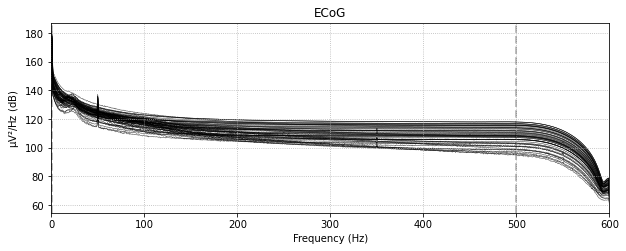

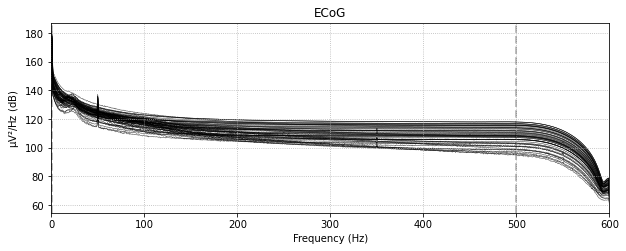

In [83]:
raw.plot_psd()